# Data Scientist Associate Case Study

## Company Background

EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question

Your manager has asked you to answer the following:
- Can you predict which reviews come from people who have never owned the moped before?  

## Dataset
The dataset contains reviews about other mopeds from a local website. The data you will use for this analysis can be accessed here: `"moped.csv"`

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Case Study Submission


In [223]:
# Importing basic modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [224]:
# Loading data into dataframe

mopeds = pd.read_csv('moped.csv')


#### Original data preview


In [225]:
# Previewing data

display(mopeds.head())

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0


Checking data size, types and missing values.

In [226]:
# Information on missing values and data types

print(mopeds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB
None


Checking unique values

In [227]:
# Information on number of unique values in each variable

print(mopeds.nunique())

Used it for          2
Owned for            3
Model Name          38
Visual Appeal        5
Reliability          5
Extra Features       5
Comfort              5
Maintenance cost     5
Value for Money      5
dtype: int64



## Initial observations on the data

There are 713 observations in 9 columns:

"Owned for" column will be our target variable and has two unique values so I will convert it to binary values.

"Used it for" column also has two unique values and will be converted to binary data.

"Model name" column has a lot of unique values and might cause __overfitting__ and is worth exploring in EDA.

"Visual appeal" column has no missing values.

"Reliability" column has no missing values.

"Extra features" column has ~25% of missing data and I see no reason why it is so. I therefore consider dropping it completely but for now I substitute missing values with zero.

"Comfort" column has many missing values but I decide to leave it in and substitute missing values with zero.

"Maintenance cost" column also has ~25% of missing data and dropping them would be an option but they might prove useful for the model so I will fill missing values with 0. "Maintenance cost" missing value might be related to the fact that non-owners do not have this information and I would expect stron negative correlation between these two variables.

"Value for Money" tells the same story as "Maintenance cost".


## Data Validation tasks performed

For numercial data: all missing values were replaced with zero.

For categorical data: unique values in ownership column were reduced from *'> 6 months'* and *'<= 6 months'* to *'Owned'*

In [228]:
# Data Validation
# Check all variables in the data against the criteria in the dataset above

# Replacing missing values in numerical columns with zero

mopeds = mopeds.fillna(value=0)

# Combining 2 categories of "Owned for" column:
# '> 6 months', '<= 6 months'
#  into 1 category:
# 'Owned'

mopeds['Owned for'] = mopeds['Owned for'].replace(['> 6 months', '<= 6 months'], 'Owned')

display(mopeds.head())

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,0.0,4.0,0.0,1.0
1,Leisure,Owned,TVS iQube,3.0,1.0,0.0,3.0,0.0,3.0
2,Commuting,Owned,TVS iQube,4.0,4.0,0.0,5.0,0.0,2.0
3,Commuting,Owned,TVS iQube,1.0,1.0,0.0,1.0,0.0,1.0
4,Commuting,Owned,TVS iQube,3.0,4.0,0.0,3.0,0.0,2.0



## Exploratory Data Analysis

The target variable is ownership, so I want to see how it is split. Around 81% of the observations are by owners. This __imbalance__ might cause issues with model accuracy but I will get back to this if needed.

In [229]:
# Exploratory Analysis
# Explore the characteristics of the variables in the data

ownership = mopeds['Owned for'].value_counts(normalize=True).reset_index()
ownership.columns = ['ownership','share']
print(ownership)

     ownership     share
0        Owned  0.810659
1  Never owned  0.189341



### "Average ratings by ownership"

Barplot shows that on average owners rate _visual appeal_, _reliability_ and _comfort_ substantially lower than non-owners. _Maintenance cost_ and _value for money_ are on average rated slightly higher by owners than non-owners although the difference might have been bigger for original data (without replacing missing values with zeros). _Extra features_ shows almost no difference in rating but also here missing data might have had influence on that state. Nonetheless it leads me to believe that this variable can be dropped from our model.

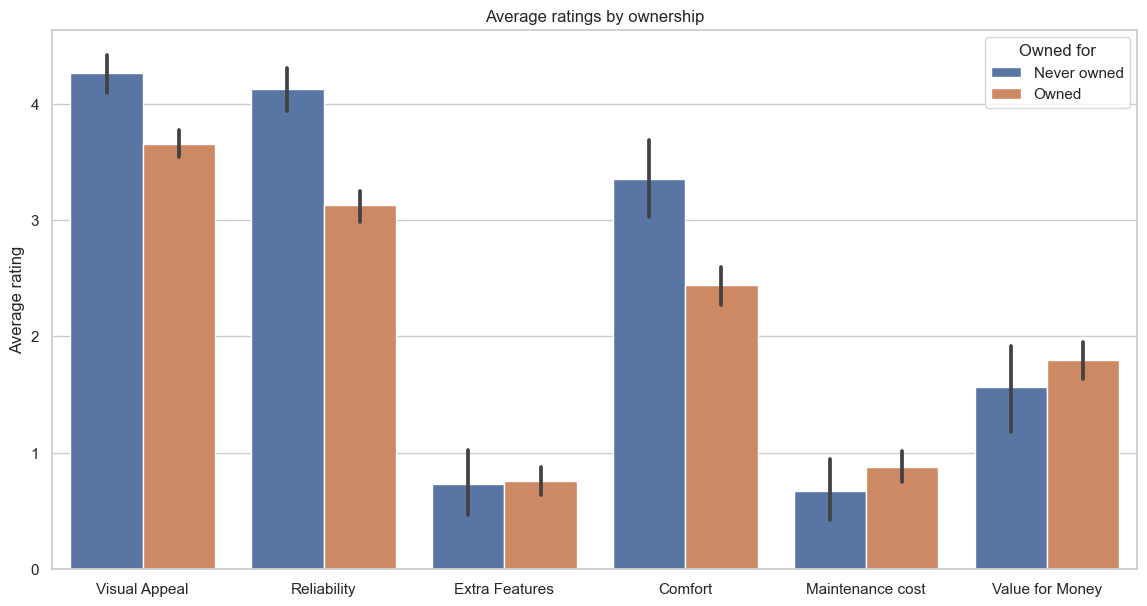

In [230]:
# Preparing data for visualisation

numerical_cols = mopeds._get_numeric_data().columns.values.tolist()

mopeds_owners = pd.melt(mopeds, id_vars='Owned for', value_vars=numerical_cols)

# Visualising average rating of numerical variables grouped by ownership

sns.set_theme(style="whitegrid")
plt.figure(figsize = (14, 7))

sns.barplot(
    data=mopeds_owners,
    x='variable',
    y='value',
    hue='Owned for'
)

plt.title('Average ratings by ownership')
plt.xlabel('')
plt.ylabel('Average rating')
plt.show()


### "Average ratings by usage"

Barplot shows than on average leisure users rank _visual appeal_, _reliability_ and _comfort_ higher than commute users. There's no substantial difference by usage in other features.

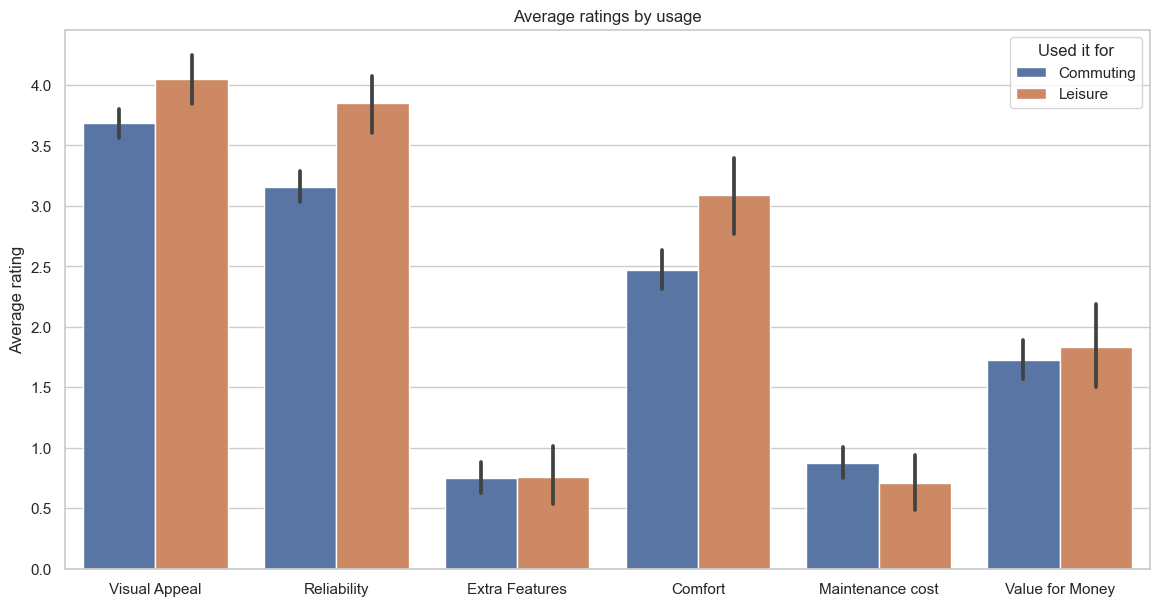

In [231]:
# Preparing data for visualisation

mopeds_usage = pd.melt(mopeds, id_vars='Used it for', value_vars=numerical_cols)

# Visualising average rating of numerical variables grouped by usage

plt.figure(figsize = (14, 7))

sns.barplot(
    data=mopeds_usage,
    x='variable',
    y='value',
    hue='Used it for'
)

plt.title('Average ratings by usage')
plt.xlabel('')
plt.ylabel('Average rating')
plt.show()


### "Model share total vs. model share owners"

From this barplot I see that most moped models are represented in __small numbers__. Overlaid ownership share by particular model reflects the global 81% percent share value. On one hand, there are some models that are exclusively present in observations made by owners. On the other hand, these models represent small numbers and can throw off the ML algorithm. I decided to include them in modeling.

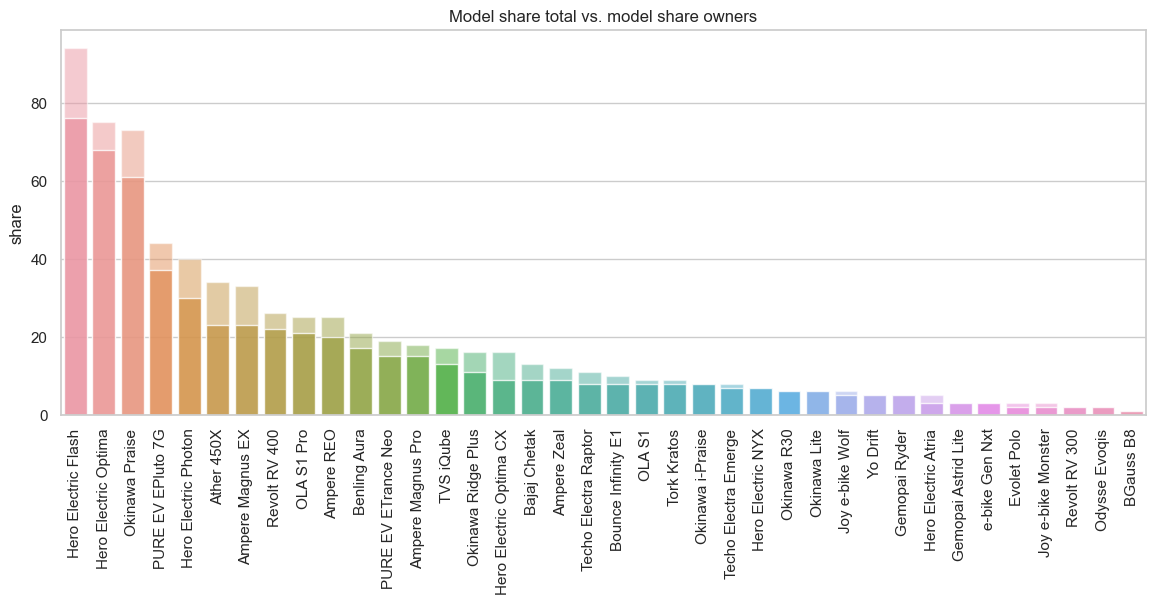

In [232]:
# Preparing data for visualisation

models = mopeds['Model Name'].value_counts().reset_index()
models.columns = ['model','share']

models_owned = mopeds[mopeds['Owned for'] == 'Owned']['Model Name'].value_counts().reset_index()
models_owned.columns = ['model','share']

# Visualising average rating of numerical variables grouped by ownership

plt.figure(figsize = (14, 5))
sns.barplot(data=models, x='model', y='share', alpha=0.5)
sns.barplot(data=models_owned, x='model', y='share', alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel('')
plt.title('Model share total vs. model share owners')

plt.show()

### "Features correlation"

Heatmap shows moderate correlation between _visual appeal_, _reliability_, _comfort_ and _value for money_.

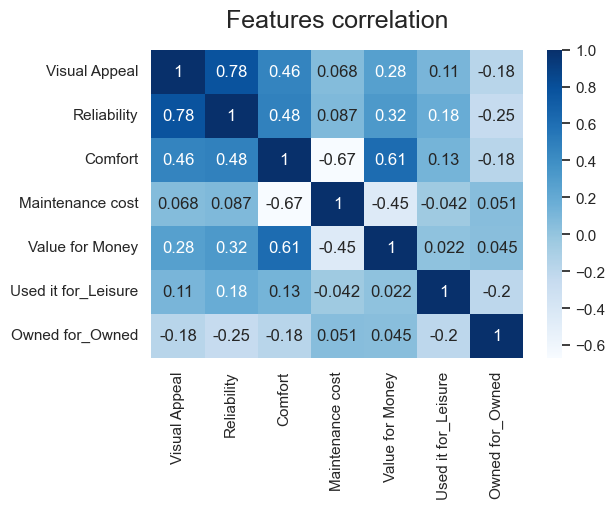

In [233]:
# Preparing data for visualisation

mopeds_preheat = mopeds.drop(['Model Name', 'Extra Features'], axis=1)
mopeds_heat = pd.get_dummies(mopeds_preheat, drop_first=True)

# Visualising model distribution

plt.figure(figsize=(6, 4))

heatmap = sns.heatmap(mopeds_heat.corr(), cmap='Blues', annot=True )

heatmap.set_title('Features correlation', fontdict={'fontsize':18}, pad=16);

plt.show()


### "Features correlation to ownership"

Heatmap shows there is no sigle variable strongly correlated with our target variable: _ownership_.

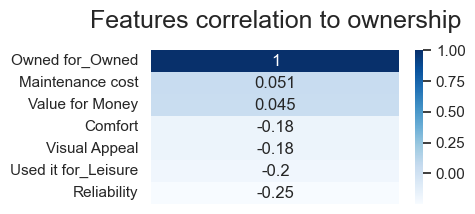

In [234]:
# Preparing data for visualisation

mopeds_preheat = mopeds.drop(['Model Name', 'Extra Features'], axis=1)
mopeds_heat = pd.get_dummies(mopeds_preheat, drop_first=True)

# Visualising average rating of numerical variables grouped by ownership

plt.figure(figsize=(4, 2))

heatmap = sns.heatmap(mopeds_heat.corr()[['Owned for_Owned']].sort_values(by='Owned for_Owned', ascending=False), cmap='Blues', annot=True, xticklabels=False)

heatmap.set_title('Features correlation to ownership', fontdict={'fontsize':18}, pad=16)

plt.show()

After above analysis I decided to drop extra feature column.

In [235]:
# Dropping extra features column

mopeds_ml = mopeds.drop(['Extra Features'], axis=1)

Non-numerical data is transformed to numerical using dummies. Although it is more computationally expensive, I want to avoid model misinterpretting 32 numbers for moped models as ranks. With dataset of this size it should not be a big issue.

In [236]:
# Getting dummy variables for categorical data; except labels

mopeds_dum = pd.get_dummies(mopeds, columns=['Used it for', 'Model Name'], drop_first=True, dtype=float)

I use LabelEncoder to convert our label variables into binary data.

In [237]:
# Label encoding non-numeric variables for ML

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mopeds_dum['Owned for'] = le.fit_transform(mopeds_dum['Owned for'])

## Model Fitting

The question I am trying to answer falls into a __classification problem__ category. Namely: predicting which reviews come from people who have never owned the moped before.

__Logistic regression__ will be the base algorithm. Its simplicity is adequate to the dataset size and the problem in place.

I will compare it against __random forest classifier__ which is more powerful and should yield better results for non-linear problems.

The data has no outliers so both models should do well.

In [238]:
# Importing necessary modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [239]:
# Splitting data into target and predictor variables

X = mopeds_dum.drop('Owned for', axis=1).values
y = mopeds_dum['Owned for'].values

# Splitting the available data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [240]:
# Fitting and predicting data with LogisticRegression and RandomForestClassifier and default settings

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)


## Model Evaluation

For model evaluation I initially looked at __accuracy__.

To judge basic classification task performed by the model I look at the overall accuracy which is slightly better for logistic regression algorithm than the random forest classifier.

In [241]:
# Model Evaluation
# Choose a metric and evaluate the performance of the two models

# Accuracy

logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)

print("How accurate is the model overall?")
print("Accuracy for LogisticRegression is {}".format(logreg_accuracy))
print("Accuracy for RandomForestClassifier is {}".format(rfc_accuracy))

How accurate is the model overall?
Accuracy for LogisticRegression is 0.8271028037383178
Accuracy for RandomForestClassifier is 0.8037383177570093


However, main problem that I sought to solve was to predict which reviews come from people who have never owned the moped before, i.e. true negative values. Therefore the metric that I evaluated the model against is __specificity__.

While accuracy score of __~82%__ would mean it is a decent model, when it comes to predicting true negatives - non-owner reviews - our __model performs poorly__ with __~33%__ specificity score for logistic regression and even lower score for random forest classifier.

In [242]:
# Calculating specificity

tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred_logreg).ravel()
spec_logreg = tn2 / (tn2 + fp2)

tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred_rfc).ravel()
spec_rfc = tn1 / (tn1 + fp1)

print("How good is the model predicting true negative values?")
print("Specificity for LogisticRegression is {}: ".format(spec_logreg))
print("Specificity for RandomForestClassifier is {}: ".format(spec_rfc))

How good is the model predicting true negative values?
Specificity for LogisticRegression is 0.3333333333333333: 
Specificity for RandomForestClassifier is 0.2619047619047619: 


Text(0.5, 1.0, 'Confusion matrix')

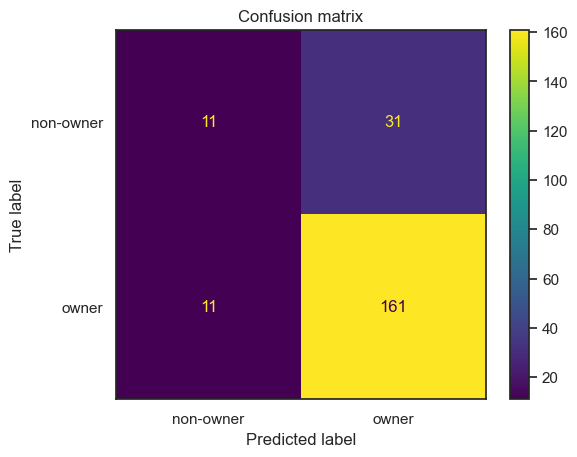

In [243]:
# Displaying confusion matrix

sns.set_theme(style="white")
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rfc), display_labels=['non-owner', 'owner'])
cmd.plot()
plt.title('Confusion matrix')


## Class imbalance

This discrepancy may stem from the __class imbalance__ I mentioned in the exploratory data analysis and I will address it now by oversampling the non-owner reviews to balance the observations. After that, I will repeat the model fitting and evaluating process on that new data to compare results.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Defining oversampling strategy

oversample = RandomOverSampler(sampling_strategy='minority')

# Splitting data into target and predictor variables

X = mopeds_dum.drop('Owned for', axis=1).values
y = mopeds_dum['Owned for'].values

# Oversampling

X_over, y_over = oversample.fit_resample(X, y)

In [244]:
# Splitting the available data into training and test sets

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(
    X_over, y_over, random_state=42)

# Fitting and predicting oversampled data with LogisticRegression and RandomForestClassifier and default settings

logreg = LogisticRegression()
logreg.fit(X_train_over, y_train_over)
y_pred_logreg_over = logreg.predict(X_test_over)

rfc = RandomForestClassifier()
rfc.fit(X_train_over, y_train_over)
y_pred_rfc_over = rfc.predict(X_test_over)

# Oversampled data accuracy

logreg_accuracy_over = accuracy_score(y_test_over, y_pred_logreg_over)
rfc_accuracy_over = accuracy_score(y_test_over, y_pred_rfc_over)

print("Accuracy for LogisticRegression is {}".format(logreg_accuracy_over))
print("Accuracy for RandomForestClassifier is {}".format(rfc_accuracy_over))

# Oversample specificity

tn4, fp4, fn4, tp4 = confusion_matrix(y_test_over, y_pred_logreg_over).ravel()
spec_logreg_over = tn4 / (tn4 + fp4)

tn3, fp3, fn3, tp3 = confusion_matrix(y_test_over, y_pred_rfc_over).ravel()
spec_rfc_over = tn3 / (tn3 + fp3)

print("\nSpecificity for LogisticRegression is {}: ".format(spec_logreg_over))
print("Specificity for RandomForestClassifier is {}: ".format(spec_rfc_over))

Accuracy for LogisticRegression is 0.6747404844290658
Accuracy for RandomForestClassifier is 0.8996539792387543

Specificity for LogisticRegression is 0.7185185185185186: 
Specificity for RandomForestClassifier is 0.9629629629629629: 


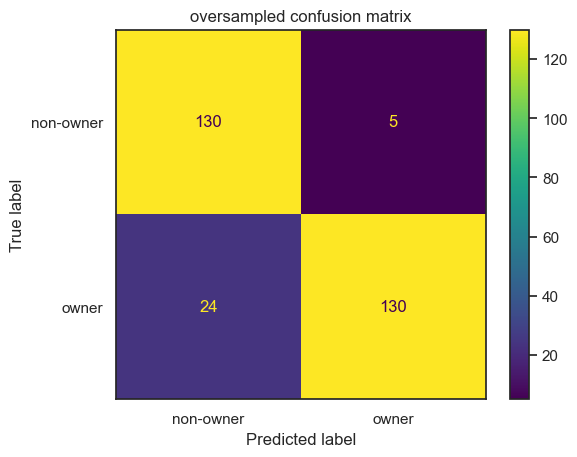

In [245]:
# Displaying oversample confusion matrix

cmd_over = ConfusionMatrixDisplay(confusion_matrix(y_test_over, y_pred_rfc_over), display_labels=['non-owner', 'owner'])
cmd_over.plot()
plt.title('oversampled confusion matrix')

plt.show()


## Balanced data results

While balancing data decreased overall accuracy of the logistic regression model to __~72%__, it increased random forest classifier's accuracy to __~87%__.

Most importantly: it dramatically increased specificity of logistic regression to __~80%__ and random forest classifier to __~97%__.


## Final thoughts

Given the nature, quality and quantity of the data provided I consider that __random forest classifier__ model is performing really well at predicting which reviews were left by people who never owned a moped before.

## ✅ When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review grading rubric, have you included everything that will be graded?
- Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your case study